In [94]:

#algorithm for canny edge detection

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import skimage.io as io
import skimage


def cannyEdge(img, sigma, th1, th2):
	"""
	function finds the edges using Canny edge detection method...
	:param im:input image
	:param sigma: sigma is the std-deviation and refers to spread of gaussian
	:param th1:low threshold used to identify weak edges...
	:param th2: high threshold used to identify strong edges...
	:return:
	a binary edge image...
	"""

	size = int(2*(np.ceil(3*sigma))+1)

	x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))

	normal = 1 / (2.0 * np.pi * sigma**2)

	kernel = np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal # calculating gaussian filter

	kern_size, gauss = kernel.shape[0], np.zeros_like(img, dtype=float)

	for i in range(img.shape[0]-(kern_size-1)):
		for j in range(img.shape[1]-(kern_size-1)):
			window = img[i:i+kern_size, j:j+kern_size] * kernel
			gauss[i,j] = np.sum(window)																																																																																																																																																																																							

	kernel, kern_size = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]), 3 # edge detection
	gx, gy = np.zeros_like(gauss, dtype=float), np.zeros_like(gauss, dtype=float)

	for i in range(gauss.shape[0]-(kern_size-1)):
		for j in range(gauss.shape[1]-(kern_size-1)):
			window = gauss[i:i+kern_size, j:j+kern_size] 
			gx[i,j], gy[i,j] = np.sum(window * kernel.T), np.sum(window * kernel)																																																																																																																																																																																							

	magnitude = np.sqrt(gx**2 + gy**2)
	theta = ((np.arctan(gy/gx))/np.pi) * 180 # radian to degree conversion
	nms = np.copy(magnitude)

	theta[theta<0] += 180

	# non maximum suppression; quantization and suppression done in same step
	for i in range(theta.shape[0]-(kern_size-1)):
		for j in range(theta.shape[1]-(kern_size-1)):
			if (theta[i,j]<=22.5 or theta[i,j]>157.5):
				if(magnitude[i,j]<=magnitude[i-1,j]) and (magnitude[i,j]<=magnitude[i+1,j]): nms[i,j]=0
			if (theta[i,j]>22.5 and theta[i,j]<=67.5):
				if(magnitude[i,j]<=magnitude[i-1,j-1]) and (magnitude[i,j]<=magnitude[i+1,j+1]): nms[i,j]=0
			if (theta[i,j]>67.5 and theta[i,j]<=112.5):
				if(magnitude[i,j]<=magnitude[i+1,j+1]) and (magnitude[i,j]<=magnitude[i-1,j-1]): nms[i,j]=0
			if (theta[i,j]>112.5 and theta[i,j]<=157.5):
				if(magnitude[i,j]<=magnitude[i+1,j-1]) and (magnitude[i,j]<=magnitude[i-1,j+1]): nms[i,j]=0
	

	weak, strong = np.copy(nms), np.copy(nms)

	# weak edges
	weak[weak<th1] = 0
	weak[weak>th2] = 0

	# strong edges
	strong[strong<th2] = 0
	strong[strong>th2] = 1

	# plotting multiple images
	fig = plt.figure()
	a=fig.add_subplot(2,2,1)
	imgplot = plt.imshow(gauss, cmap='gray')
	a.set_title('Gaussian')
	a=fig.add_subplot(2,2,2)
	imgplot = plt.imshow(magnitude, cmap='gray')
	a.set_title('Magnitude')	
	a=fig.add_subplot(2,2,3)
	imgplot = plt.imshow(weak, cmap='gray')
	a.set_title('Weak edges')
	a=fig.add_subplot(2,2,4)
	imgplot = plt.imshow(strong, cmap='gray')
	a.set_title('Strong edges')
	plt.show()
	return plt.imshow(strong, cmap='gray')

In [95]:
from skimage import io
from skimage import feature
from skimage.color import rgb2gray

In [96]:
image = io.imread('background.jpg')
gray = rgb2gray(image)

C:\Users\Agrim Nautiyal\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Agrim Nautiyal\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Agrim Nautiyal\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in arctan
C:\Users\Agrim Nautiyal\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in less


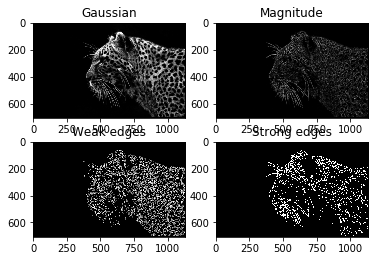

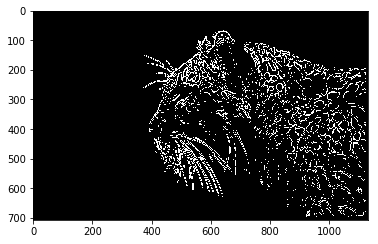

In [117]:
s = cannyEdge(gray, 1.0, 5,20)

In [72]:
np.max(image)

255

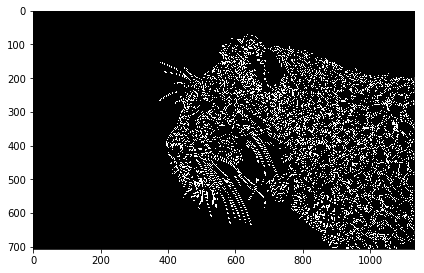

In [111]:
edges = feature.canny(gray, 1.0, 0.1, 0.5)
io.imshow(edges)

In [105]:
feature.canny

<function skimage.feature._canny.canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)>